# Sentiment Analysis in Banking and Financial Services



## Natural Language Processing

In [29]:
#Import required Libraries

import pandas as pd
import numpy as np

#Libraies to clean the data
import nltk
from nltk.corpus import stopwords

#library for data Visualization
import wordcloud
import matplotlib.pyplot as plt
import re

#library and function for tokanization and vectorization
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#Importing libraries to build our models
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten
from sklearn.metrics import classification_report, accuracy_score

# 1. Corpus

In [30]:
data = pd.read_csv('/content/customer_reviewers.tsv', sep='\t', encoding='iso-8859-1')

In [31]:
#Print how our dataset looks like: The dataset has two columns, which are sentiments and the news.
data.head()

,ï»¿rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [32]:
#rename the columns of your dataframe
data.rename(columns={"feedback": "sentiment", "verified_reviews": "reviews"}, inplace=True)
data.head()

,ï»¿rating,date,variation,reviews,sentiment
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [33]:
#Printing the first 5 news of our dataset

for review_item in data['reviews'].iloc[0:5]:
    print("\n", review_item)


 Love my Echo!

 Loved it!

 Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.

 I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.

 Music


# 2. Cleaning and Segmentation

In [34]:
#Turn all Uppercase words into lowercase and remove special character and digits.

# Handle potential non-string values (e.g., NaN) by converting them to empty strings
data['reviews'] = data['reviews'].fillna('')

#1. Turn all UpperCase and Capitalized word into lowecase.
data['reviews'] = data['reviews'].apply(lambda word:' '.join(word.lower() for word in word.split()))

#2. Remove any digits/numbers and special character
data['reviews'] = data['reviews'].str.replace('\d+',' ',regex=True)

#3. Remove special characters
data['reviews'] = data['reviews'].str.replace('\W',' ',regex=True)

#print the dataset after the clean.
data.head()

<>:10: SyntaxWarning: invalid escape sequence '\d'
<>:13: SyntaxWarning: invalid escape sequence '\W'
<>:10: SyntaxWarning: invalid escape sequence '\d'
<>:13: SyntaxWarning: invalid escape sequence '\W'
/tmp/ipython-input-223316914.py:10: SyntaxWarning: invalid escape sequence '\d'
  data['reviews'] = data['reviews'].str.replace('\d+',' ',regex=True)
/tmp/ipython-input-223316914.py:13: SyntaxWarning: invalid escape sequence '\W'
  data['reviews'] = data['reviews'].str.replace('\W',' ',regex=True)


,ï»¿rating,date,variation,reviews,sentiment
0,5,31-Jul-18,Charcoal Fabric,love my echo,1
1,5,31-Jul-18,Charcoal Fabric,loved it,1
2,4,31-Jul-18,Walnut Finish,sometimes while playing a game you can answer...,1
3,5,31-Jul-18,Charcoal Fabric,i have had a lot of fun with this thing my ...,1
4,5,31-Jul-18,Charcoal Fabric,music,1


In [35]:
#Remove StopWords: To remove stopword you use the Library nltk, in particular you will need to import nltk.corpus.

import nltk
nltk.download('stopwords')

stopwords_list = set(stopwords.words('english'))
data['reviews'] = data['reviews'].apply(lambda word: ' '.join([word for word in word.split() if word not in stopwords_list]))

#printing dataset
data.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,ï»¿rating,date,variation,reviews,sentiment
0,5,31-Jul-18,Charcoal Fabric,love echo,1
1,5,31-Jul-18,Charcoal Fabric,loved,1
2,4,31-Jul-18,Walnut Finish,sometimes playing game answer question correct...,1
3,5,31-Jul-18,Charcoal Fabric,lot fun thing yr old learns dinosaurs control ...,1
4,5,31-Jul-18,Charcoal Fabric,music,1


In [36]:
#Printing the first 5 news of our dataset

for news in data['reviews'].iloc[0:5]:
    print("\n",news)


 love echo

 loved

 sometimes playing game answer question correctly alexa says got wrong answers like able turn lights away home

 lot fun thing yr old learns dinosaurs control lights play games like categories nice sound playing music well

 music


love echo loved sometimes playing game answer question correctly alexa says got wrong answers like able turn lights away home lot fun thing yr old learns dinosaurs control lights play games like categories nice sound playing music well music received echo gift needed another bluetooth something play music easily accessible found smart speaker canâ wait see else without cellphone cannot use many features ipad see use great alarm u r almost deaf hear alarm bedroom living room reason enough keep fun ask random questions hear response seem smartbon politics yet think th one purchased working getting one every room house really like features offer specifily playing music echos controlling lights throughout house looks great love iâ listened songs havenâ heard since childhood get news weather information itâ great sent year old dad talks constantly love learning knew things eveyday still figuring everything works far easy use understand make laugh times purchased mother knee problems give so

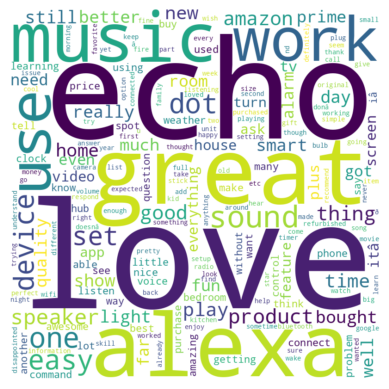

In [37]:
from wordcloud import WordCloud

common_words=''

for i in data.reviews:
    i = str(i)
    word = i.split()
    common_words += " ".join(word)+" "
print(common_words)


wc = WordCloud(width = 800, height = 800, background_color='white', min_font_size=10, collocations=False).generate(common_words)

plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

# 3-4. Tokanization and Vectorization

In [38]:
#Let breakdown each news into words: We will need to import Tokanizer library and keras.
tokenizer = Tokenizer(num_words=500, split=' ')
tokenizer.fit_on_texts(data['reviews'].values)
X = tokenizer.texts_to_sequences(data['reviews'].values)

#print the news tokes-vectors.
print("number of rows:{}\nnumber of columns: {}".format(len(X),len(X[0])))
X[0:5]

number of rows:3150
number of columns: 2


[[1, 2],
 [177],
 [186, 102, 235, 475, 4, 293, 42, 387, 6, 58, 70, 69, 258, 20],
 [91, 36, 45, 139, 96, 69, 21, 259, 6, 67, 11, 102, 5, 34],
 [5]]

In [39]:
#The length of our tokenized data are not even, lets set each text with the same length.
X = pad_sequences(X)

#print the news tokes-vectors.
print("number of rows:{}\nnumber of columns: {}".format(len(X),len(X[0])))
X[0:5]

number of rows:3150
number of columns: 164


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   1,   2],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
  

# 5-6. Embedding and Building our Model

In [40]:
# Defining a new variable to store the sentiment [labels]
Y = data['sentiment']

#Using LabelEncoding:this method will turn the sentiment values into numerical values [encode strings values into numerical values]
Y = LabelEncoder().fit_transform(Y)

#Turning labels into categorical values.
Y = to_categorical(Y)

In [41]:
#Splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.20)
print("Number of samples for training [news]:{}\nNumber of sample for training [Labels]:{}".format(X_train.shape,y_train.shape))
print("Number of samples for testing [news]:{}\nNumber of sample for testing [Labels]:{}".format(X_test.shape,y_test.shape))

Number of samples for training [news]:(2520, 164)
Number of sample for training [Labels]:(2520, 2)
Number of samples for testing [news]:(630, 164)
Number of sample for testing [Labels]:(630, 2)


In [42]:
#define model
# n_features is the length of the input sequences, which is X_train.shape[1]
model = Sequential()
model.add(Embedding(500,120,input_shape=(X_train.shape[1],)))
model.add(Flatten())
model.add(Dense(10, activation='relu', kernel_initializer ='he_normal')) # Removed redundant input_shape
model.add(Dense(8, activation='relu', kernel_initializer ='he_normal'))
model.add(Dense(2, activation='softmax')) # Changed units to 2 and activation to softmax for categorical_crossentropy

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:100: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [43]:
# compile the model
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

# fit the model
model.fit(X_train,y_train, epochs=20, batch_size=32, verbose=2)

Epoch 1/20
79/79 - 2s - 24ms/step - accuracy: 0.9202 - loss: 0.2963
Epoch 2/20
79/79 - 1s - 7ms/step - accuracy: 0.9202 - loss: 0.2302
Epoch 3/20
79/79 - 1s - 7ms/step - accuracy: 0.9202 - loss: 0.1477
Epoch 4/20
79/79 - 1s - 7ms/step - accuracy: 0.9627 - loss: 0.1072
Epoch 5/20
79/79 - 1s - 7ms/step - accuracy: 0.9746 - loss: 0.0886
Epoch 6/20
79/79 - 1s - 7ms/step - accuracy: 0.9817 - loss: 0.0771
Epoch 7/20
79/79 - 1s - 7ms/step - accuracy: 0.9853 - loss: 0.0660
Epoch 8/20
79/79 - 1s - 7ms/step - accuracy: 0.9849 - loss: 0.0609
Epoch 9/20
79/79 - 1s - 8ms/step - accuracy: 0.9857 - loss: 0.0552
Epoch 10/20
79/79 - 1s - 8ms/step - accuracy: 0.9845 - loss: 0.0522
Epoch 11/20
79/79 - 1s - 7ms/step - accuracy: 0.9861 - loss: 0.0465
Epoch 12/20
79/79 - 1s - 7ms/step - accuracy: 0.9849 - loss: 0.0451
Epoch 13/20
79/79 - 1s - 7ms/step - accuracy: 0.9869 - loss: 0.0429
Epoch 14/20
79/79 - 1s - 8ms/step - accuracy: 0.9857 - loss: 0.0388
Epoch 15/20
79/79 - 1s - 8ms/step - accuracy: 0.9841 - l

In [44]:
# Evaluate out model using the accuracy metric
loss, acc = model.evaluate(X_test,y_test,verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.932


In [45]:
# Evaluating the model
sentiment_prediction = model.predict(X_test)
predicted_inverse = np.argmax(sentiment_prediction,axis=1)
y_test_inverse = np.argmax(y_test,axis=1)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [46]:
target_name = ["Class {}".format(i) for i in range(2)]

print(classification_report(y_test_inverse,predicted_inverse,target_names=target_name))

              precision    recall  f1-score   support

     Class 0       0.68      0.45      0.54        56
     Class 1       0.95      0.98      0.96       574

    accuracy                           0.93       630
   macro avg       0.81      0.71      0.75       630
weighted avg       0.92      0.93      0.93       630



In [47]:
def vectorize_review(review_text):
    # 1. Turn all UpperCase and Capitalized word into lowercase.
    cleaned_review = ' '.join(word.lower() for word in review_text.split())
    # 2. Remove any digits/numbers and special character
    cleaned_review = re.sub(r'\d+', ' ', cleaned_review)
    # 3. Remove special characters
    cleaned_review = re.sub(r'\W', ' ', cleaned_review)
    # 4. Remove StopWords
    cleaned_review = ' '.join([word for word in cleaned_review.split() if word not in stopwords_list])

    # Tokenize the cleaned review
    tokenized_review = tokenizer.texts_to_sequences([cleaned_review])

    # Pad the sequence to match the input length of the model
    padded_review = pad_sequences(tokenized_review, maxlen=X_train.shape[1])
    return padded_review

In [48]:
def predict_sentiment(review_vector):
    # Predict sentiment probabilities
    probabilities = model.predict(review_vector)
    # Get the predicted class (0 or 1)
    predicted_class = np.argmax(probabilities, axis=1)[0]

    # Map to sentiment label
    if predicted_class == 0:
        return "Negative"
    else:
        return "Positive"

In [49]:
user_review = input("Enter your review: ")
review_vector = vectorize_review(user_review)
predicted_sentiment = predict_sentiment(review_vector)

print("Predicted Sentiment:", predicted_sentiment)

Enter your review: Not the right product for me
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted Sentiment: Positive
